In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.shape

(4269, 13)

In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [9]:
for i in df.columns:
  print(df.groupby(i).size(),end='\n')
  print("\n")

loan_id
1       1
2       1
3       1
4       1
5       1
       ..
4265    1
4266    1
4267    1
4268    1
4269    1
Length: 4269, dtype: int64


 no_of_dependents
0    712
1    697
2    708
3    727
4    752
5    673
dtype: int64


 education
 Graduate        2144
 Not Graduate    2125
dtype: int64


 self_employed
 No     2119
 Yes    2150
dtype: int64


 income_annum
200000     42
300000     51
400000     35
500000     46
600000     49
           ..
9500000    40
9600000    39
9700000    40
9800000    48
9900000    35
Length: 98, dtype: int64


 loan_amount
300000       6
400000       7
500000      16
600000      13
700000      15
            ..
38400000     1
38500000     1
38700000     2
38800000     1
39500000     1
Length: 378, dtype: int64


 loan_term
2     404
4     447
6     490
8     386
10    436
12    456
14    405
16    412
18    422
20    411
dtype: int64


 cibil_score
300    11
301     8
302    13
303     6
304     8
       ..
896    11
897     4
898     5
899     6


In [10]:
required = []
for i in df.columns:
  temp = df.groupby(i)
  if len(temp)<4 :
    required.append(i)
    print(df.groupby(i).size(),end="\n\n")

 education
 Graduate        2144
 Not Graduate    2125
dtype: int64

 self_employed
 No     2119
 Yes    2150
dtype: int64

 loan_status
 Approved    2656
 Rejected    1613
dtype: int64



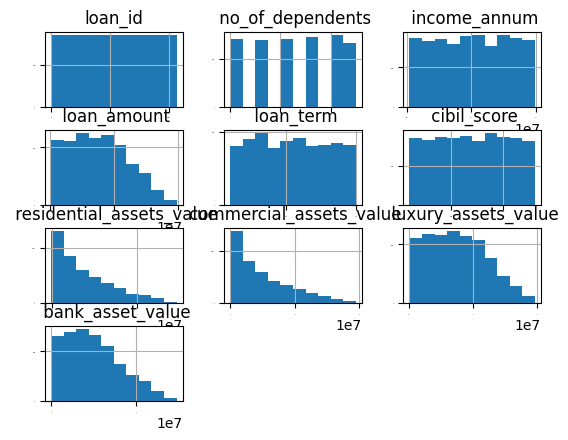

In [11]:
df.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1)
plt.show()

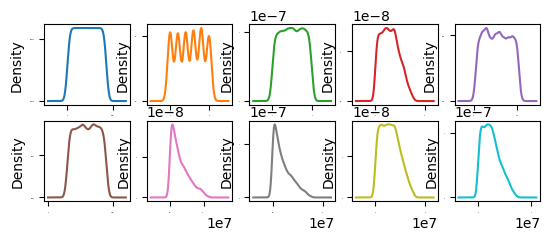

In [12]:
df.plot(kind='density', subplots=True, layout=(4,5), sharex=False, legend=False,
fontsize=1)
plt.show()

In [13]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [14]:
df.dropna(axis=0,inplace=True)

In [15]:
df.shape

(4269, 13)

In [16]:
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#df['Gender'] = le.fit_transform(df['Gender'])

In [18]:
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [19]:
required

[' education', ' self_employed', ' loan_status']

In [20]:
for i in required:
  df[i] = le.fit_transform(df[i])

In [21]:
#df['Dependents'] = le.fit_transform(df['Dependents'])

In [22]:
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
5,6,0,0,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,1
6,7,5,0,0,8700000,33000000,4,678,22500000,14800000,29200000,4300000,0
7,8,2,0,1,5700000,15000000,20,382,13200000,5700000,11800000,6000000,1
8,9,0,0,1,800000,2200000,20,782,1300000,800000,2800000,600000,0
9,10,5,1,0,1100000,4300000,10,388,3200000,1400000,3300000,1600000,1


In [23]:
from sklearn.decomposition import PCA


X = df.drop([' loan_status'],axis=1)
Y = df[' loan_status']
X.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
5,6,0,0,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000
6,7,5,0,0,8700000,33000000,4,678,22500000,14800000,29200000,4300000
7,8,2,0,1,5700000,15000000,20,382,13200000,5700000,11800000,6000000
8,9,0,0,1,800000,2200000,20,782,1300000,800000,2800000,600000
9,10,5,1,0,1100000,4300000,10,388,3200000,1400000,3300000,1600000


In [24]:
X.drop(['loan_id'],inplace=True,axis=1)

In [25]:
cols = X.columns
cols

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'],
      dtype='object')

In [26]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [27]:
Y.head(10)

0    0
1    1
2    1
3    1
4    1
5    1
6    0
7    1
8    0
9    1
Name:  loan_status, dtype: int64

In [28]:
from sklearn.ensemble import ExtraTreesClassifier


model = ExtraTreesClassifier()
model.fit(X, Y)

features = list(model.feature_importances_)


for i in range(len(cols)):
  print(cols[i]," --> ",features[i])

 no_of_dependents  -->  0.028351459886857455
 education  -->  0.011593168421963247
 self_employed  -->  0.012202589421330755
 income_annum  -->  0.03464905031439499
 loan_amount  -->  0.04054694357489781
 loan_term  -->  0.06572450909136053
 cibil_score  -->  0.6668434532702049
 residential_assets_value  -->  0.03603636125421033
 commercial_assets_value  -->  0.0348184764637566
 luxury_assets_value  -->  0.034854002572565344
 bank_asset_value  -->  0.03437998572845817


In [29]:
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X['ApplicantIncome'] = scaler.fit_transform(X['ApplicantIncome'].to_numpy().reshape(-1,1))
#X['CoapplicantIncome'] = scaler.fit_transform(X['CoapplicantIncome'].to_numpy().reshape(-1,1))
#X['LoanAmount'] = scaler.fit_transform(X['LoanAmount'].to_numpy().reshape(-1,1))
#X['Loan_Amount_Term'] = scaler.fit_transform(df['LoanAmount'].to_numpy().reshape(-1,1))

In [30]:
X.head(10)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
5,0,0,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000
6,5,0,0,8700000,33000000,4,678,22500000,14800000,29200000,4300000
7,2,0,1,5700000,15000000,20,382,13200000,5700000,11800000,6000000
8,0,0,1,800000,2200000,20,782,1300000,800000,2800000,600000
9,5,1,0,1100000,4300000,10,388,3200000,1400000,3300000,1600000


In [31]:
X.shape

(4269, 11)

In [32]:
from sklearn.model_selection import train_test_split

validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size)

In [33]:
num_folds = 200
scoring = 'accuracy'

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [35]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [36]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


LR: 0.653382 (0.125978)
LDA: 0.934526 (0.061087)
KNN: 0.568399 (0.118197)
CART: 0.974837 (0.034880)
NB: 0.773660 (0.105151)
SVM: 0.619330 (0.116875)


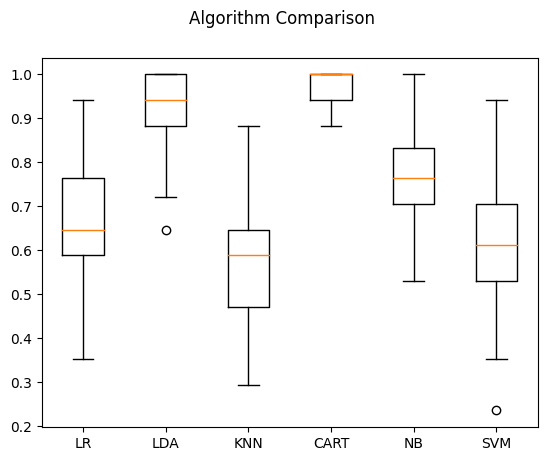

In [37]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [38]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))


pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


ScaledLR: 0.921683 (0.062392)
ScaledLDA: 0.934526 (0.061087)
ScaledKNN: 0.897663 (0.080450)
ScaledCART: 0.976895 (0.033551)
ScaledNB: 0.936830 (0.060941)
ScaledSVM: 0.944755 (0.055216)


In [39]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.912631 using {'n_neighbors': 19}
0.874199 (0.079696) with: {'n_neighbors': 1}
0.887418 (0.077465) with: {'n_neighbors': 3}
0.897075 (0.080129) with: {'n_neighbors': 5}
0.897680 (0.076184) with: {'n_neighbors': 7}
0.903464 (0.073165) with: {'n_neighbors': 9}
0.908186 (0.069804) with: {'n_neighbors': 11}
0.910294 (0.070647) with: {'n_neighbors': 13}
0.911422 (0.065957) with: {'n_neighbors': 15}
0.912010 (0.064661) with: {'n_neighbors': 17}
0.912631 (0.066553) with: {'n_neighbors': 19}
0.912631 (0.066293) with: {'n_neighbors': 21}


In [41]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


AB: 0.974330 (0.040919)
GBM: 0.982467 (0.031475)
RF: 0.981291 (0.027906)
ET: 0.966405 (0.044080)


In [45]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier()
model.fit(rescaledX, Y_train)

rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))

print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.9836065573770492
[[532   9]
 [  5 308]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       541
           1       0.97      0.98      0.98       313

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



# Stoped the last algorithm as it consumes lot of training time

In [43]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 